In [1]:
!echo $USER, $HOSTNAME
!date
!export OMP_NUM_THREADS=2

, 37b56e4af392
Fri Jan  9 02:28:50 PM UTC 2026


## Coined quantum walk on a hypercube

In [3]:
import hiperwalk as hpw
import numpy as np
hb="y"
myHPC_option="cpu" if hb == "y" else None

hpw.set_hpc(myHPC_option)

import os
os.environ["OMP_NUM_THREADS"] = "2" # não altera o valor alterior atribuido ao executar o jupyter na linha de comando



BD, em def set_hpc(hpc), hpc= cpu


### Defining the graph and the QW instance

The next command creates a hypercube with name 'cube', which is an instance of the Graph class. The dimension of the hypercube in 'n'.

In [4]:
n =3+1
cube = hpw.Hypercube(n)

The next command creates a QW on the hypercube, which is an instance of the Coined class.

In [5]:
qw = hpw.Coined(cube)

bd, em coined.py, __init__
graph: <hiperwalk.graph.graph.Graph object at 0x7450f3e1df10>
kwargs: {}

_set_shift     :   Tempo decorrido: 0.000804 segundos

_set_coin      :   Tempo decorrido: 0.000150 segundos

_set_marked    :   Tempo decorrido: 0.000038 segundos
bd, em hiperwalk/quantum_walk/coined.py: def _set_evolution
BD, em hiperwalk/quantum_walk/coined.py: get_coin(self)

_set_evolution :   Tempo decorrido: 0.011432 segundos

BD, em hiperblas_wrapper.c, py_sparse_matrix_new
BD, em /home/bidu/hiperwalk/hiperblas-core/src/libhiperblas-cpu-bridge-smatrix.c, smatrix_new
BD, em hiperblas_wrapper.c: static PyObject* py_smatrix_connect( ...
BD, em hiperblas-core/src/libhiperblas-cpu-bridge-smatrix.c: void smatreqdev(smatrix_t *m) {
BD, em hiperblas_wrapper.c, py_sparse_matrix_new
BD, em /home/bidu/hiperwalk/hiperblas-core/src/libhiperblas-cpu-bridge-smatrix.c, smatrix_new
BD, em hiperblas_wrapper.c: static PyObject* py_smatrix_connect( ...
BD, em hiperblas-core/src/libhiperblas-cpu-bri

### Setting the initial state in the center

There are many equivalent ways (two of them are described below) to define the initial state: 

$$\sum_{v\in N(0)}\frac{|(0,v)\rangle}{\sqrt{n}},$$

where $N(0)$ is the neighborhood of vertex 0. Note that the computational basis is comprised of arcs. This initial state is equivalent to a uniform superposition of the coin state when the walker is on vertex $0$. The easiest way of creating this initial state is using the 'uniform_state' method. The input is a list of vertices.

In [6]:
ini_state = qw.uniform_state([0])
print(ini_state)

[0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


There is an alternate way to create the same initial state. First, let us check which are the neighbors of vertex 0.

In [7]:
cube.neighbors(0)

array([1, 2, 4, 8])

The vertices of the hypercube range from 0 to $2^n - 1$. The neighbors of vertex 0 are 1, 2, 4, 8, etc., because they have a Hamming distance of one from vertex 0. An arbitrary state can be created with the 'state' method by inputting a list of (amplitude, arc) pairs. The notation for an arc is (tail, head), where both tail and head are vertices. The arcs with a tail of 0 include (0,1), (0,2), (0,4), and so on. This method creates the equivalent initial state.

In [8]:
ini_state = qw.state([(1/np.sqrt(n), (0,2**i)) for i in range(n)])
print(ini_state)

bd, em coined.py: def state
[0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


### Probability distribution over the hypercube graph

bd, em hiperwalk/quantum_walk/quantum_walk.py:    def simulate
bd, start=1, end=9, step=1
bd, em quantum_walk.py: def _prepare_engine(self, state, hpc =  cpu
bd, em simulate, initial state, state= [ 0.500  0.500  0.500 ...  0.000  0.000  0.000];  state.l2Norm= 1.0
bd, em def _simulate_step, step = 0
bd, em def simulate,                     state_index =  0
bd, em def _simulate_step, step = 1
bd, self._simul_vec_in  [ 0.500  0.500  0.500 ...  0.000  0.000  0.000],  self._simul_vec_in.l2Norm= 1.0
bd, self._simul_vec_out [ 0.000  0.000  0.000 ...  0.000  0.000  0.000], self._simul_vec_out.l2Norm= 1.0
bd, em def simulate,                     state_index =  1
bd, em def _simulate_step, step = 1
bd, self._simul_vec_in  [ 0.000  0.000  0.000 ...  0.000  0.000  0.000],  self._simul_vec_in.l2Norm= 1.0
bd, self._simul_vec_out [-0.250 -0.250 -0.250 ...  0.000  0.000  0.000], self._simul_vec_out.l2Norm= 1.0
bd, em def simulate,                     state_index =  2
bd, em def _simulate_step, step =

WhileIt  : Tempo decorrido: 0.007925 segundos


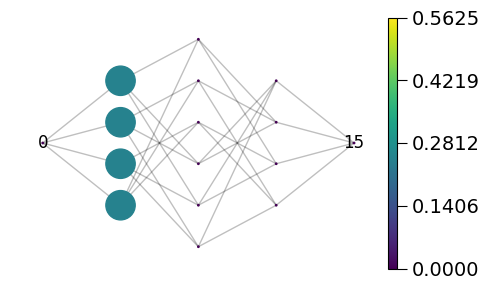

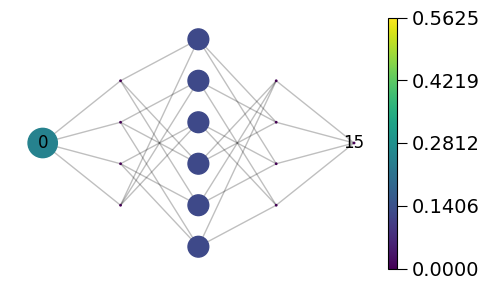

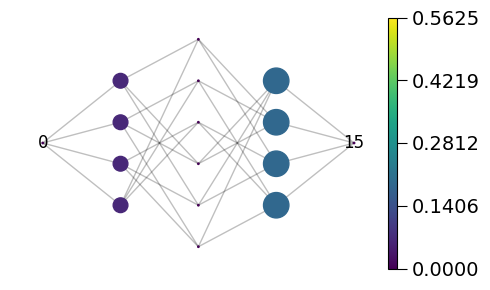

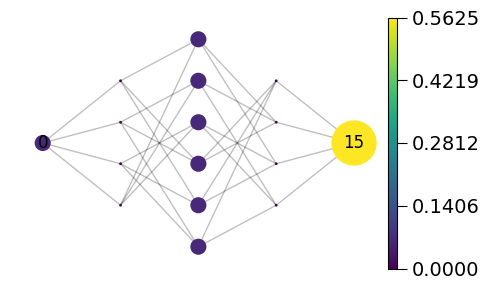

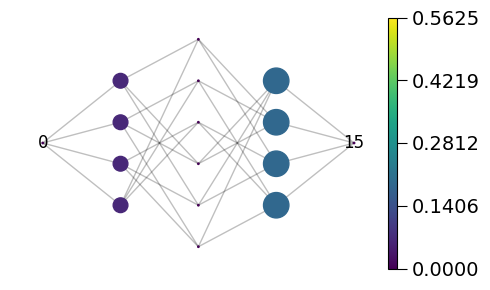

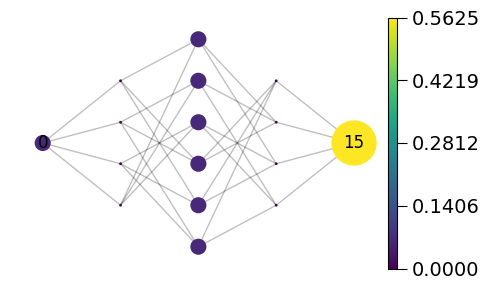

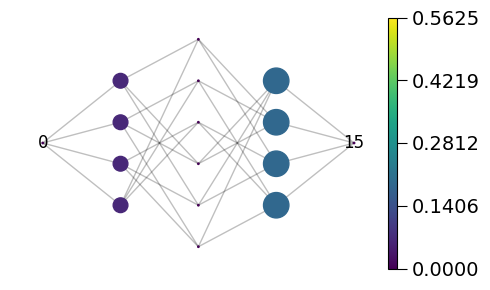

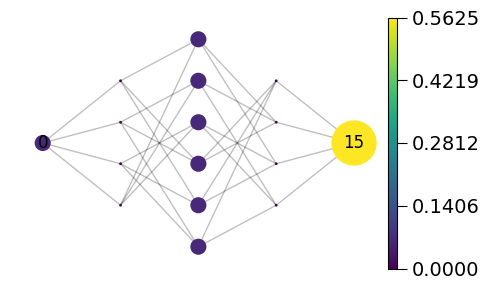

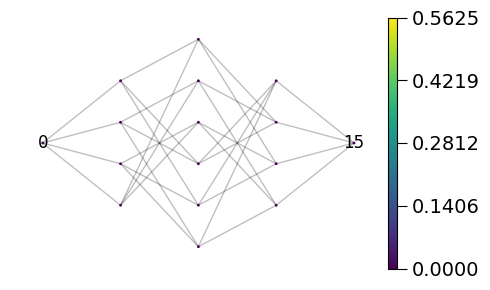

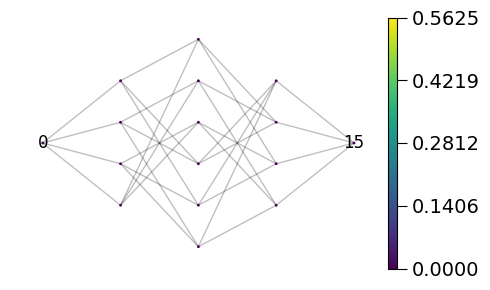

In [9]:
aNumSteps=8
myNumSteps   =aNumSteps
startStep=1;endStep=startStep+myNumSteps;step=1
aRange=(startStep,endStep,step)
states = qw.simulate(range_=aRange, state=ini_state)
    
#final_state = qw.simulate(range = (n,n+1), state = ini_state)
probs = qw.probability_distribution(states)
hpw.plot_probability_distribution(probs, graph=cube, figsize=(5,3))

### Histogram of the probability distribution

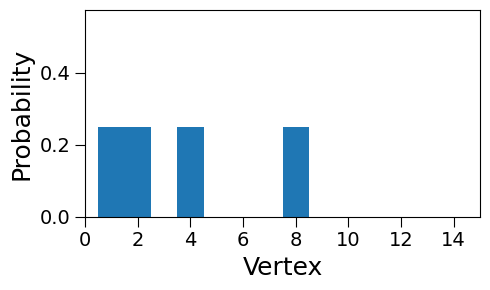

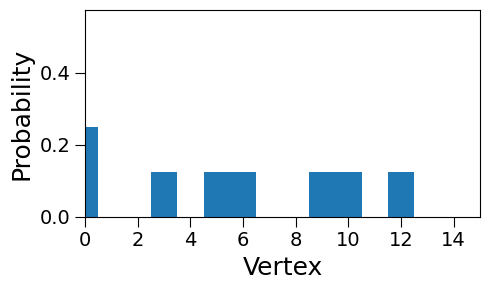

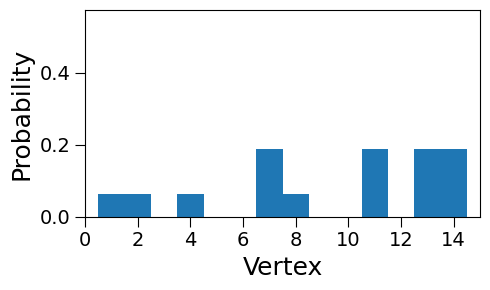

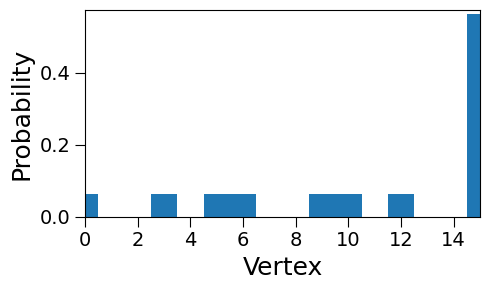

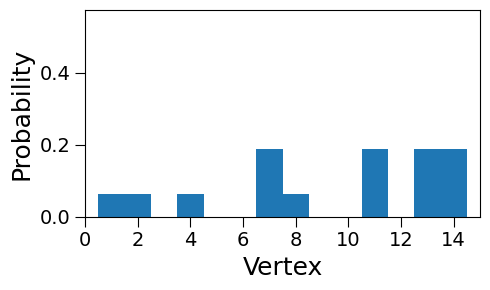

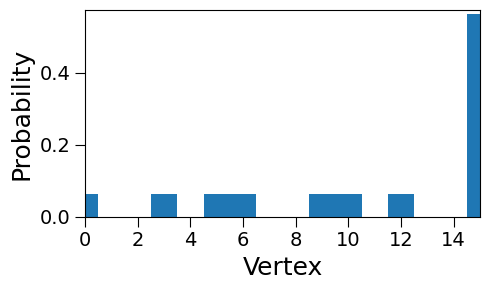

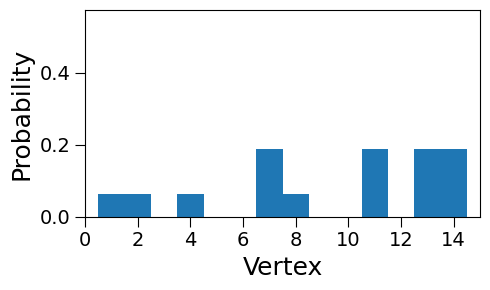

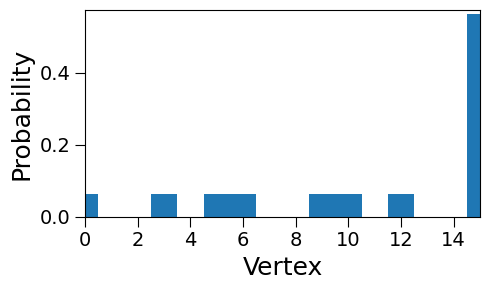

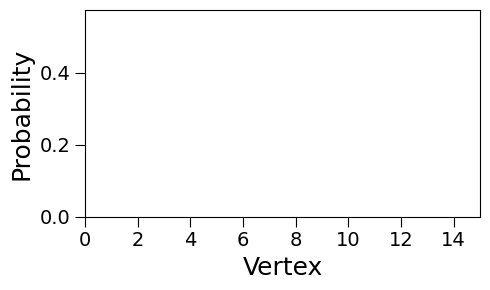

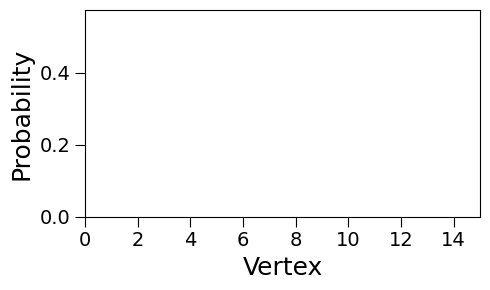

In [11]:
hpw.plot_probability_distribution(probs, plot='histogram', figsize=(5,3))

### Animation of the quantum walk

In [12]:
list_of_probs = qw.probability_distribution(states)
hpw.plot_probability_distribution(list_of_probs, graph=cube, animate=True, figsize=(6,3))

bd, em coined.probability_distribution, 0
bd, em coined.probability_distribution, 1
bd, em coined.probability_distribution, 5
